<a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/> </a>

# Introduction to Graph Neural Networks

## 01 - Introduction to Graphs and Graph Neural Networks ##
In this notebook, we will learn the fundamental concepts of graphs and graph neural networks.

**Table of Contents**
<br>
This notebook covers the below sections:
1. [Introduction to Graphs](#1)
    * [1.1 - Working With Graph Data](#1.1)
    * [1.2  - Building a Simple Graph](#1.2)
    * [1.3 - Manipulating Node and Edge Features](#s1.3)
    * [1.4 - Graph Data Representation](#s1.4)
2. [Dataset Overview](#s1-2)
    * [Exploratory Data Analysis](#s1-2.1)
    * [Exercise #2 - Find Node With Highest Number of Connections](#s1-e2)
    * [Data Preparation and Subgraph](#s1-2.2)
3. [Building Graph Neural Networks for Node Classification](#s1-3)
    * [Message Passing and Graph Convolution](#s1-3.1)
4. [Building GNNs With PyTorch](#s1-4)
    * [Sum-Pooling](#s1-4.1)
    * [Baseline MLP Model](#s1-4.2)
    * [Exercise #3 - Mean-Pooling](#s1-e3)
    * [GCN, Graph Convolutional Network](#s1-4.3)
5. [Building GNNs With DGL's Built-In Modules](#s1-5)
    * [GraphConv](#s1-5.1)

<a name='1'></a>
## 1- Introduction to Graphs ##
A graph is a type of data structure that contains **nodes** and **edges**. A node can be a person, place, or thing, and the edges define the relationship between nodes. Edges can be directed, where an edge has a source node and a destination node. They can also be undirected, where there is no notion of source or destination nodes. Graphs are excellent in dealing with complex problems with relationships and interactions.

Data that are naturally represented by graphs include:
* **Citation networks** can be used to study how publications relate to each other.
* **Social networks** are tools to study patterns in collective behavior of people, institutions, and organizations. A social network graph represents groups of people by modelling individuals as nodes, and their relationships as edges.
* **Molecules** can be described as a graph, where nodes are atoms and edges are the bonds they share.

The structure of graphs can vary greatly in terms of the number of nodes, edges, and the connectivity of nodes.

Some of the properties that make graphs different from other types of data include:
1. A graph exists in non-Euclidean space, which makes it harder to interpret the data. To visualize the data, there are various dimensionality reduction tools.
2. Graphs are unstructured and do not have a fixed form.
3. Their large size and high dimensionality increase the complexity for human interpretation.

<a name='1.1'></a>
### 1.1 - Working With Graph Data ###
In this lab, we will use the open-source Deep Graph Library, [DGL](https://www.dgl.ai/), and [PyTorch](https://pytorch.org/) to work with graph data. Other popular graph deep learning libraries include [Spektral](https://graphneural.network/), [Graph Nets](https://www.deepmind.com/open-source/graph-nets), and [PyTorch Geometric](https://www.pyg.org/), which allow us to manipulate graph data in similar ways.

DGL represents each node by a unique integer, known as a node ID, and each edge by a pair of integers corresponding to the IDs of its end nodes. DGL assigns each edge a unique integer, known as edge ID, based on the order in which it was added to the graph starting with `0`. In DGL, all edges are directed, and an edge `(u, v)` indicates that the direction goes from source node `u` to destination node `v`. When making **undirected** graphs, edges can be treated as **bidirectional** by adding **reverse edges**.

We start by creating a sample graph below:

<p><img src='images/sample_graph_1.png' width=240></p>

A [`DGLGraph`](https://docs.dgl.ai/en/latest/api/python/dgl.DGLGraph.html) can be created with [`dgl.graph(data)`](https://docs.dgl.ai/en/0.9.x/generated/dgl.graph.html), which takes a pair of node IDs `(U, V)` that represent the source node(s) and destination node(s). Once created, we can use [`dgl.DGLGraph.nodes()`](https://docs.dgl.ai/en/0.8.x/generated/dgl.DGLGraph.nodes.html), [`dgl.DGLGraph.edges()`](https://docs.dgl.ai/en/0.8.x/generated/dgl.DGLGraph.edges.html), or [`dgl.DGLGraph.edge_ids(u, v)`](https://docs.dgl.ai/generated/dgl.DGLGraph.edge_ids.html) to reference the nodes and edges. Edges can also be identified using [`dgl.DGLGraph.find_edges(eid)`](https://docs.dgl.ai/en/0.8.x/generated/dgl.DGLGraph.find_edges.html), [`dgl.DGLGraph.in_edges(v)`](https://docs.dgl.ai/en/0.8.x/generated/dgl.DGLGraph.in_edges.html), or [`dgl.DGLGraph.out_edges(u)`](https://docs.dgl.ai/en/0.8.x/generated/dgl.DGLGraph.out_edges.html). For finding the node degree, or the number of connections, we can use [`dgl.DGLGraph.in_degrees(v)`](https://docs.dgl.ai/en/0.8.x/generated/dgl.DGLGraph.in_degrees.html) or [`dgl.DGLGraph.out_degrees(u)`](https://docs.dgl.ai/en/0.8.x/generated/dgl.DGLGraph.out_degrees.html). Optionally, we can use [`networkx`](https://networkx.org/) to visualize the small graphs.

_Note: More details about the DGLGraph API, which includes [querying basic graph structure](https://docs.dgl.ai/en/0.7.x/api/python/dgl.DGLGraph.html#querying-graph-structure) properties, can be found [here](https://docs.dgl.ai/en/0.7.x/api/python/dgl.DGLGraph.html)._

In [1]:
# DO NOT CHANGE THIS CELL
# import dependencies
import dgl
import torch

In [2]:
# DO NOT CHANGE THIS CELL
# create source nodes for edges (2, 1), (3, 2), (4, 3)
sample_u=[2, 3, 4]

# create destination nodes for edges (2, 1), (3, 2), (4, 3)
sample_v=[1, 2, 3]

# create graph
sample_g=dgl.graph((sample_u, sample_v))

# print graph
print(sample_g)

Graph(num_nodes=5, num_edges=3,
      ndata_schemes={}
      edata_schemes={})


In [3]:
# DO NOT CHANGE THIS CELL
# print node IDs
print("Node IDs are: \n{}\n".format(sample_g.nodes()))

# print the source and destination nodes of every edge
print("Source & destination nodes of every edge are: \n{}\n".format(sample_g.edges()))

# print edge IDs
print("Edge IDs are: \n{}".format(sample_g.edge_ids(sample_u, sample_v)))

Node IDs are: 
tensor([0, 1, 2, 3, 4])

Source & destination nodes of every edge are: 
(tensor([2, 3, 4]), tensor([1, 2, 3]))

Edge IDs are: 
tensor([0, 1, 2])


In [4]:
# DO NOT CHANGE THIS CELL
# make bidirected graph
sample_g=dgl.to_bidirected(sample_g)

# dgl.add_reverse_edges(graph) achieves similar result
# sample_g=dgl.add_reverse_edges(sample_g)

# print graph properties
print("Node IDs are: \n{}\n".format(sample_g.nodes()))
print("Source & destination nodes of every edge are: \n{}\n".format(sample_g.edges()))
print("Edge IDs for directed graph are: \n{}\n".format(sample_g.edge_ids(sample_u, sample_v)))

# print all edges
print("Edge IDs for bidirectional/undirected graph are: \n{}".format(sample_g.edge_ids(sample_u+sample_v, sample_v+sample_u)))

Node IDs are: 
tensor([0, 1, 2, 3, 4])

Source & destination nodes of every edge are: 
(tensor([1, 2, 2, 3, 3, 4]), tensor([2, 1, 3, 2, 4, 3]))

Edge IDs for directed graph are: 
tensor([1, 3, 5])

Edge IDs for bidirectional/undirected graph are: 
tensor([1, 3, 5, 0, 2, 4])


In [5]:
# DO NOT CHANGE THIS CELL
# find all edges connected to node 1
node_id=1
print("Source node(s) {0[0]} are connected to destination node(s) {0[1]}. ".format(sample_g.in_edges(node_id)))

Source node(s) tensor([2]) are connected to destination node(s) tensor([1]). 


In [6]:
# DO NOT CHANGE THIS CELL
# get node degrees
print("Node degrees for all nodes: \n{}".format(sample_g.in_degrees()))

Node degrees for all nodes: 
tensor([0, 1, 2, 2, 1])


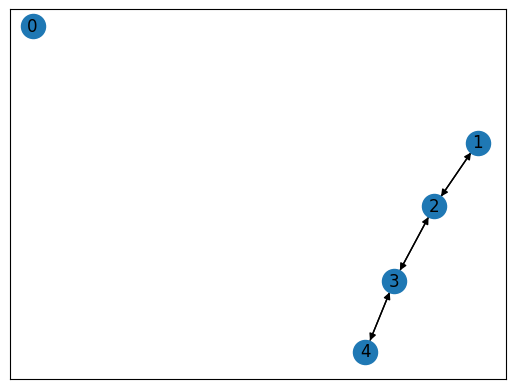

In [7]:
# DO NOT CHANGE THIS CELL
# visualize the graph
import networkx as nx

# draw plot using networkx
G=dgl.to_networkx(sample_g)
nx.draw_networkx(G)

_Note: This graph consists of 5 nodes and 3 edges. The number of nodes is automatically inferred from the max node ID in the given edges. Furthermore, the edge IDs will automatically get numbered based on the order they were added and double-counted for bidirectional/undirected graphs._

<a name='s1-e1'></a>
### 1.2  - Building a Simple Graph ###
Let's create the below graph.

<p><img src='images/sample_graph_2.png' width=240></p>

**Instructions**:<br>
* Modify the `<FIXME>`s only to create the sample graph.

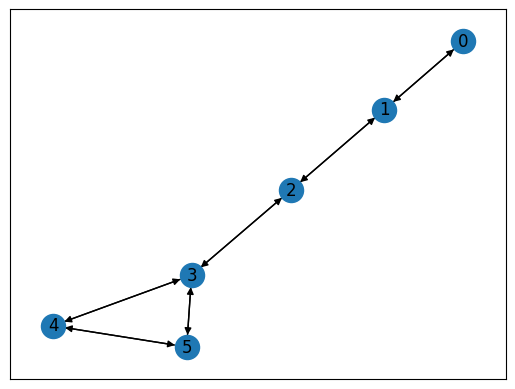

In [8]:
# create sources nodes and destination nodes
u=[1, 1, 2, 3, 3, 4]
v=[0, 2, 3, 4, 5, 5]
g=dgl.graph((u, v))

# when making undirected graphs, edges are treated as bidirectional
g=dgl.to_bidirected(g)

# draw plot using networkx
nx.draw_networkx(dgl.to_networkx(g))

<a name='1.3'></a>
### 1.3 - Manipulating Node and Edge Features ###
Many graph data contain features on nodes and edges. We can assign and retrieve node and edge features via the [`dgl.DGLGraph.ndata`](https://docs.dgl.ai/en/latest/generated/dgl.DGLGraph.ndata.html#dgl.DGLGraph.ndata) and [`dgl.DGLGraph.edata`](https://docs.dgl.ai/en/latest/generated/dgl.DGLGraph.edata.html#dgl.DGLGraph.edata) interfaces similar to how we would add/retrieve key-value pairs in a [Python dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries). `ndata` and `edata` can also be used to store other node-level and edge-level data for deep learning like `labels` and `train`/`test masks`. There can also be global properties about the overall graph.

_Note: DGLGraph only accepts features stored as numerical [tensors](https://pytorch.org/docs/stable/tensors.html). The vast development of deep learning has provided us many ways to encode various types of attributes into numerical features._

In [9]:
# DO NOT CHANGE THIS CELL
# print ndata
print("Node data: \n{}\n".format(g.ndata))

# print edata
print("Edge data: \n{}".format(g.edata))

Node data: 
{}

Edge data: 
{}


Below we demonstrate assigning random values as node feature vectors. We use the [`dgl.DGLGraph.num_nodes()`](https://docs.dgl.ai/generated/dgl.DGLGraph.num_nodes.html#dgl.DGLGraph.num_nodes) function to get the number of nodes in our graph and then we assign a random multi-dimensional node feature vector called `feat` using `dgl.DGLGraph.ndata`. We can do similar assignments with [`dgl.DGLGraph.num_edges()`](https://docs.dgl.ai/en/0.8.x/generated/dgl.DGLGraph.num_edges.html?highlight=num%20edges#dgl.DGLGraph.num_edges) and `dgl.DGLGraph.edata`.

_Note: Node and edge features can be named anything just like how we can have arbitrarily named keys for a Python dictionary. For example, we could have called the node feature `f_n` instead of `feat`._

In [10]:
# DO NOT CHANGE THIS CELL
# get number of nodes
num_nodes=g.num_nodes()

# assign a 4-dimensional random node feature vector called feat for each node
g.ndata['feat']=torch.randn(num_nodes, 4)

# print node features
print("Node features ({}): \n{}\n".format(g.ndata['feat'].shape, g.ndata))

# assign a 5-dimensional random edge feature vector called f_e for each edge
num_edges=g.num_edges()
g.edata['f_e']=torch.randn(num_edges, 5)
print("Edge features ({}): \n{}".format(g.edata['f_e'].shape, g.edata))

Node features (torch.Size([6, 4])): 
{'feat': tensor([[-0.3437,  0.4316,  0.8426, -0.2038],
        [ 1.3942, -0.3034, -0.6207, -0.1688],
        [ 0.1353,  1.0772,  0.0991,  0.2808],
        [ 0.5467, -0.5941, -1.5838, -0.8079],
        [-1.2040,  0.0408, -1.1279,  0.9670],
        [ 1.4833, -0.0141, -0.0951, -1.3381]])}

Edge features (torch.Size([12, 5])): 
{'f_e': tensor([[-1.2874, -1.5580,  0.3290,  0.0992, -0.9077],
        [ 0.4811,  0.8252,  0.1885,  1.7697, -0.4270],
        [-1.3217,  0.8972,  2.7062, -0.2695,  0.1622],
        [ 0.0768,  0.3335,  0.2633,  1.4343, -2.1407],
        [-2.3037,  0.6813,  1.2316,  0.2466,  0.3273],
        [ 0.4377,  0.8878,  0.6236, -1.2645, -1.6712],
        [-0.5432, -1.6782,  2.0680, -1.1517,  0.9531],
        [ 1.1424, -0.1885,  1.2879,  1.7245, -1.7139],
        [-0.2594, -0.8802, -0.5360, -1.0964,  1.5414],
        [-2.0327, -2.2349,  1.2421,  1.8920,  1.4021],
        [-0.0059,  0.9323,  0.5003,  0.5646,  1.5732],
        [-0.0602,  1.149

<a name='s1-1.3'></a>
### 1.4 - Graph Data Representation ###
A graph is often represented by an **adjacency matrix**. If a graph has `n` nodes, then the adjacency matrix would have a dimension that is `n` x `n`. The matrix contains `0/1-valued` vectors to indicate whether a connection exists between a source node and a destination node. While [`dgl.DGLGraph.adj()`](https://docs.dgl.ai/en/0.8.x/generated/dgl.DGLGraph.adj.html?highlight=adj) returns a [sparse Tensor](https://pytorch.org/docs/stable/sparse.html), we can further convert it to a dense Tensor so it's more visually intuitive. For our graph, the adjacency matrix looks like the below:

<p><img src='images/adj_matrix.png' width=240></p>

However, while visualizing graph structure as an adjacency matrix might be convenient and intuitive, it's typically not the most efficient if it's sparse (filled with zeros). Another way we can represent edges is by using **adjacency lists**. They describe the connectivity of edges between nodes as a tuple of 1D tensors `(v, u)`, representing destination and sources nodes of all edges.

In [11]:
# DO NOT CHANGE THIS CELL
# print adjacency matrix as a sparse Tensor
print("Adjacency matrix (sparse Tensor): \n{}\n".format(g.adj()))

# print adjacency matrix as a dense Tensor
print("Adjacency matrix (dense Tensor): \n{}".format(g.adj().to_dense()))

FileNotFoundError: Cannot find DGL C++ sparse library at c:\github\GNN-portfolio\.venv\Lib\site-packages\dgl\dgl_sparse\dgl_sparse_pytorch_2.1.0.dll

In [ ]:
# DO NOT CHANGE THIS CELL
# manually calculate node degrees and use .long() to convert to integers
g.ndata['degree']=g.adj().to_dense().sum(axis=1).long()

# print node degrees
print("Node degrees computed manually: \n{}\n".format(g.ndata['degree']))

# node degrees can also be obtained via DGL API
print("Node degrees via DGL API: \n{}".format(g.in_degrees()))

# features can also be deleted, analogous to Dictionary entries
del g.ndata['degree']

In [ ]:
# DO NOT CHANGE THIS CELL
# print destination and source nodes for all edges as adjacency lists
u=g.edges()[0].tolist()
v=g.edges()[1].tolist()
print("Edges: \n{}".format(list(zip(u, v))))

<a name='s1-2'></a>
## Dataset Overview ##
For a realistic demonstration, we are using the [`ogbn-arxiv`](https://ogb.stanford.edu/docs/nodeprop/#ogbn-arxiv) dataset from [**O**pen **G**raph **B**enchmark](https://ogb.stanford.edu/). The `ogbn-arxiv` dataset is a directed graph, representing the citation network between Computer Science (CS) arXiv papers. Each node is an arXiv paper and each directed edge indicates that one paper cites another one. Each paper comes with a 128-dimensional [word2vec](https://en.wikipedia.org/wiki/Word2vec) feature vector. It's a great example of how GNNs can be used to leverage the information embedded in graphs, in order to make predictions.

Each node belongs to one of the 40 subject areas of arXiv CS papers, e.g., cs.AI, cs.LG, and cs.OS, which are manually determined and labeled by the paper’s authors and arXiv moderators.

While some datasets may contain more than 1 graph, the `ogbn-arxiv` dataset contains a single graph at index `0`.

In [ ]:
# DO NOT CHANGE THIS CELL
# import dependencies
from ogb.nodeproppred import DglNodePropPredDataset

# load data
dataset=DglNodePropPredDataset(name='ogbn-arxiv')

# assign graph and labels
g, labels=dataset[0]
print(g)

<a name='s1-2.1'></a>
### Exploratory Data Analysis ###

We will perform some basic exploratory data analysis to understand the dataset.

In [ ]:
# DO NOT CHANGE THIS CELL
# print node keys
print("Node dict keys: \n{}\n".format(g.ndata.keys()))

# print node feature shape
print("Node feature shape (num_of_nodes x num_of_features): \n{}\n".format(g.ndata['feat'].shape))

# print number of nodes
print("Number of nodes: \n{}\n".format(g.num_nodes()))

# print number of edges
print("Number of edges: \n{}".format(g.num_edges()))

In [ ]:
# DO NOT CHANGE THIS CELL
# print labels
print("Labels shape: \n{}\n".format(labels.shape))
print("Label classes: \n{}".format(labels.unique()))

<a name='s1-e2'></a>
### Exercise #2 - Finding Node With Highest Number of Connections ###
Let's find the node with the highest node degree.

**Instructions**:<br>
* Modify the `<FIXME>` only to find the node with the highest number of connections.

In [ ]:
# placeholder for max node id and max connections count
max_node_id=0
max_count=0

# iterate through all nodes
for each_node in g.nodes():
    # check if number of connections is larger than current max
    count=len(g.<<<<FIXME>>>>(each_node)[0])
    if count>max_count:

        # set max_count and max_node_id
        max_count=count
        max_node_id=each_node

# print node with most connections
print("Node_{} has the most connections. ".format(max_node_id))

In [ ]:
# DO NOT CHANGE THIS CELL
# Node degrees can also be accessed via `.in_degrees()` or `.out_degrees()`
print("Node degrees via DGL API: \n{}\n".format(g.in_degrees()))

# print node with most connections
print("Node_{} has the most connections. ".format(torch.argmax(g.in_degrees())))

<a name='s1-2.2'></a>
### Data Preparation and Subgraph ###
Before we can use the dataset for machine learning, we will perform data splitting for model validation. The original dataset contains 169,343 nodes and 1,116,243 edges. We will split the data based on the publication dates of the papers. By training the model on older papers, we can then use it to predict the labels for newly-published papers. This could provide tremendous value for the arXiv moderators. Given the range of history our data contains, we will train on papers published until 2017, validate on those published in 2018, and test on those published since 2019. The OGB dataloader conveniently provides the `train`, `valid`, and `test` masks for us directly.

Furthermore, we'll first work with a subset of the data for the purpose of demonstration. Specifically, since we will be using the dense adjacency matrix to build our first GNNs, our memory capacity allows only a subset of the nodes. DGL provides a convenient [`dgl.DGLGraph.subgraph(nodes)`](https://docs.dgl.ai/en/0.2.x/generated/dgl.DGLGraph.subgraph.html) function to help us achieve this. We can obtain the node/edge mapping from the subgraph to the original graph by looking into the node feature `dgl.NID` or edge feature `dgl.EID` in the new graph. `subgraph` also copies the original features to the subgraph. Once we understand how GNNs work, we will be able to train with the sparse adjacency matrix for the entire dataset.

_Note: While the `ogbn-arxiv` dataset represents a directed graph, we will ignore the edge direction and treat it as undirected._

In [ ]:
# DO NOT CHANGE THIS CELL
# import dependencies
import numpy as np

# assign number of labels
num_classes=6

# get subset of node indices
sub_nodes=np.where(np.isin(labels, range(num_classes)))[0]

# get subset of labels
sub_labels=labels[np.isin(labels, range(num_classes))]

# get subgraph and make bidirectional/undirected
sub_g=g.subgraph(sub_nodes)
sub_g=dgl.to_bidirected(sub_g, copy_ndata=True)
print(sub_g)

# print parent node IDs
parent_nodes=sub_g.ndata[dgl.NID]
print("Parent node IDs: {}".format(parent_nodes))

In [ ]:
# DO NOT CHANGE THIS CELL
# get data split
split_idx=dataset.get_idx_split()

# get train, valid, and test splits
train_idx, valid_idx, test_idx=split_idx["train"], split_idx["valid"], split_idx["test"]

# DO NOT CHANGE THIS CELL
# sample subset for the train, valid, and test set using parent_nodes
train_mask=[True if idx in train_idx else False for idx in parent_nodes]
valid_mask=[True if idx in valid_idx else False for idx in parent_nodes]
test_mask=[True if idx in test_idx else False for idx in parent_nodes]

print("{} nodes for training: \n{} nodes for validation: \n{} nodes for testing. ".format(sum(train_mask), sum(valid_mask), sum(test_mask)))

<a name='s1-3'></a>
## Building Graph Neural Networks for Node Classification ##
Graph data is a challenge as standard deep learning methods focus primarily on structured data, such as fixed-size pixel grids (images) and sequences (text). Graph neural networks, or **GNN**s, refers to a variety of different approaches for applying deep learning on graphs that:
* Take full advantage of the graph structure
* Considers scalability and efficiency based on the size of the graph and its features
* Provide an easy way to do node-level, edge-level, and graph-level prediction tasks.

<a name='s1-3.1'></a>
### Message Passing and Graph Convolution ###
**Message passing** is when each node in a graph sends information about itself to its neighbors and receives messages back from them to update its status and understand its environment. It enables graph neural networks to explore a graph's connectivity by correlating messages (features), sent by neighboring nodes, to update a node's features. The message passing feature is the core of DGL library and most graph computations in DGL rely on it. Message passing can be seen as two major steps:
1. The first step consists of the "message" stage, where the messages are sent over or scattered by the nodes to its neighbors. It is performed for all existing or relevant edges in the graph.  
2. The second step is the "reduce" stage, where the messages are **aggregated** by the receiving node and used to update its features. It is performed for all existing or relevant nodes in the graph.

**Graph [convolution](https://en.wikipedia.org/wiki/Convolution)** combines information from neighborhoods and encodes updated node features to *latent representations*. It can be achieved based on a simple message passing mechanism that involves a linear combination of neighborhood features where weights used for the aggregation depend only on the structure of the graph.
* An [embedding](https://en.wikipedia.org/wiki/Embedding) is a relatively low-dimensional space into which we can translate high-dimensional vectors such that similar items are close to each other.

We will demonstrate these basic mechanisms through various node classification graph neural networks. Node classification, in simple words, refers to the task of predicting the labels of specific nodes by assessing the features and information from neighboring nodes.

<p><img src='images/gnn_node_classification.png' width=720></p>

<a name='s1-4'></a>
## Building GNNs With PyTorch ##
[PyTorch](https://pytorch.org/) is an open-source machine learning framework based on the Python programming language and the [Torch](http://torch.ch/) library. It is used for creating deep neural networks and very popular for deep learning research. We will first use PyTorch to define the layers of our graph neural networks to demonstrate the basic mechanics. Later in the lab, we will also explore other methods of building graph neural networks.

Below we will define a simple two-layer graph neural network to help us explore various approaches. The first layer will apply matrix multiplication across the feature vector and the adjacency matrix, as well as a weight matrix. We will also pass the resulting matrix to a non-linear activation function for deep learning. This layer will allow us to implement various aggregation schemes such as the `sum-pooling`, `mean-pooling`, etc.

In addition to our GNN model, we will define an evaluation function and a train function that will allow us to do standard deep learning model training. Since we are training classification models, we will calculate [negative log likelihood loss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html) (`nll_loss`) as loss and `accuracy` as the evaluation metric.

<p><img src='images/aggregation.png' width=960></p>

In [ ]:
# DO NOT CHANGE THIS CELL
# import dependencies
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# DO NOT CHANGE THIS CELL
# define SimpleGraphNet
class SimpleGraphNet(nn.Module):
    """Simple graph neural network

    Parameters
    ----------
    in_feats (int): input feature size
    h_feats (int): hidden feature size
    num_classes (int): number of classes
    """
    def __init__(self, in_feats, h_feats, num_classes):
        # for inheritance we use super() to refer to the base class
        super(SimpleGraphNet, self).__init__()

        # two linear layers where each one will have its own weights, W
        # first layer computes the hidden layer
        self.layer1 = nn.Linear(in_feats, h_feats)
        # use num_classes units for the second layer to compute the classification of each node
        self.layer2 = nn.Linear(h_feats, num_classes)

    def forward(self, g, h, adj):
        """Forward computation

        Parameters
        ----------
        g (DGLGraph): the input graph
        h (Tensor): the input node features
        adj (Tensor): the graph adjacency matrix
        """
        # apply first linear layer's transform weights
        x=self.layer1(h)

        # perform matrix multiplication with the adjacency matrix and node features to
        # aggregate/recombine across neighborhoods
        x=torch.mm(adj, x)

        # apply a relu activation function
        x=F.relu(x)

        # apply second linear layer's transform weights
        x=self.layer2(x)
        return x

In [ ]:
# DO NOT CHANGE THIS CELL
# import dependencies
import time

# define evaluate
def evaluate(model, g, adj, labels, mask):
    """Model evaluation for particular set

    Parameters
    ----------
    model (nn.Module): the model
    features (Tensor): the feature tensor
    adj (Tensor): the graph adjacency matrix
    labels (Tensor): the ground truth labels
    mask (Tensor): the mask for a specific subset
    """
    # assign features
    features=g.ndata['feat']

    # set to evaluation mode
    model.eval()

    with torch.no_grad():
        # put features through model to obtain logits
        logits=model(g, features, adj)

        # get logits and labels for particular set
        logits=logits[mask]
        labels=labels[mask]

        # get most likely class and count the number of corrects
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)

        # return accuracy
        return correct.item() * 1.0 / len(labels)

In [ ]:
# DO NOT CHANGE THIS CELL
# define train
def train(model, g, adj, labels):
    """Model training

    Parameters
    ----------
    model (nn.Module): the model
    features (Tensor): the feature tensor
    adj (Tensor): the graph adjacency matrix
    labels (Tensor): the ground truth labels
    """
    # assign features
    features=g.ndata['feat']

    # use a standard optimization pipeline using the adam optimizer
    optimizer=torch.optim.Adam(model.parameters(), lr=0.02)

    # standard training pipeline with early stopping
    best_acc=0.0
    for epoch in range(200):
        start=time.time()

        # set to training mode
        model.train()

        # forward step
        # calculate logits and loss
        logits=model(g, features, adj)
        # calculate loss using log_softmax and negative log likelihood
        logp=F.log_softmax(logits, 1)
        loss=F.nll_loss(logp[train_mask], labels[train_mask])

        # backward step
        # zero out gradients before accumulating the gradients on backward pass
        optimizer.zero_grad()
        loss.backward()

        # apply the optimizer to the gradients
        optimizer.step()

        # evaluate on validation and test sets
        val_acc=evaluate(model, g, adj, labels, valid_mask)
        test_acc=evaluate(model, g, adj, labels, test_mask)

        # compare validation accuracy with best accuracy at 10 epoch intervals, which will update if exceeded
        if (epoch%10==0) & (val_acc>best_acc):
            best_acc=val_acc
            print("Epoch {:03d} | Loss {:.4f} | Validation Acc {:.4f} | Test Acc {:.4f} | Time(s) {:.4f}".format(
                epoch, loss.item(), val_acc, test_acc, time.time()-start))

<a name='s1-4.1'></a>
### Sum-Pooling ###
As a starting point, we'll train a simple graph neural network for node classification using the `sum-pooling` aggregation. Recall that `sum-pooling` can cause issues related to scaling of the feature and may not give the best results.

<p><img src='images/sum-pooling.PNG' width=240></p>

In [ ]:
# DO NOT CHANGE THIS CELL
# create adjacency matrix
adj=sub_g.adj().to_dense()

# modify the adjacency matrix by adding the identity matrix to ensure nodes consider their own features
adj=adj+torch.eye(sub_g.adj().shape[0])

In [ ]:
# DO NOT CHANGE THIS CELL
# instantiate simple model
model=SimpleGraphNet(sub_g.ndata['feat'].shape[1], 32, num_classes)

# print model architecture
print(model)

# start training
train(model, sub_g, adj, sub_labels)

<a name='s1-4.2'></a>
### Baseline MLP Model ###
We can test our model by using an [identify matrix](https://en.wikipedia.org/wiki/Identity_matrix) instead of the adjacency matrix. This is equivalent to creating a standard MLP classificaiton model that shares weights across the vertices. We can use this as a baseline to see how much improvements graph convolution offers.

In [ ]:
# DO NOT CHANGE THIS CELL
# modify the adjacency matrix by adding the identity matrix to ensure nodes consider their own features
adj=torch.eye(sub_g.adj().shape[0])

In [ ]:
# DO NOT CHANGE THIS CELL
# instantiate simple model
model=SimpleGraphNet(sub_g.ndata['feat'].shape[1], 32, num_classes)

# print model architecture
print(model)

# start training
train(model, sub_g, adj, sub_labels)

<a name='s1-e3'></a>
### Exercise #3 - Mean-Pooling ###
Graph neural networks that use a `mean-pooling` aggregation normalizes the vector to prevent features from exploding since the scale of the output features can increase.

<p><img src='images/mean-pooling.PNG' width=240></p>

**Instructions**:<br>
* Modify the `<FIXME>` only to calculate the number of connections per node.
* Execute the cell below to train a GNN for node classification using the `mean-pooling` aggregation.  

In [ ]:
# create adjacency matrix
adj=sub_g.adj().to_dense()

# modify the adjacency matrix by adding the identity matrix to ensure nodes consider their own features
adj=adj+torch.eye(sub_g.adj().shape[0])

# get node degrees
deg=<<<<FIXME>>>>

# divide the adjacency matrix by the degree matrix, which is equivalent to multiplying it with the
# inverse of the degree matrix. This gives a normalize propagation rule, which should hopefully deal with
# any exploding signal that we might have
adj=adj/deg

In [ ]:
# DO NOT CHANGE THIS CELL
# instantiate simple model
model=SimpleGraphNet(sub_g.ndata['feat'].shape[1], 32, num_classes)

# print model architecture
print(model)

# start training
train(model, sub_g, adj, sub_labels)

<a name='s1-4.3'></a>
### GCN, Graph Convolutional Network ###
The commonly cited node classification graph convolutional network (GCN), as proposed by Kipf and Welling ([arXiv](https://arxiv.org/abs/1609.02907)), uses symmetric normalization in the update rule. It involves multiplying the learnable function by the inverse square root of the degree matrix from both sides, which is analogous to dividing by the square root of the product of neighborhood sizes of a node and neighborhood sizes of the neighbor.

<p><img src='images/gcn.PNG' width=240></p>

In [ ]:
# DO NOT CHANGE THIS CELL
# create adjacency matrix
adj=sub_g.adj().to_dense()

# modify the adjacency matrix by adding the identity matrix to ensure nodes consider their own features
adj=adj+torch.eye(sub_g.adj().shape[0])

# get node degrees
deg=adj.sum(dim=0)

# normalization computes 1 over the square root of the degree matrix
# multiply that on both sides with the adjacency matrix
norm_deg=torch.diag(1.0/torch.sqrt(deg))
# get the normalized adjacency matrix by multiplying the normalized degree matrix with
# the product of the adjacency matrix and the normalized degree matrix
norm_adj=torch.mm(norm_deg, torch.matmul(adj, norm_deg))

In [ ]:
# DO NOT CHANGE THIS CELL
# instantiate simple model
model=SimpleGraphNet(sub_g.ndata['feat'].shape[1], 32, num_classes)

# print model architecture
print(model)

# start training
train(model, sub_g, norm_adj, sub_labels)

<a name='s1-5'></a>
## Building GNNs with DGL's Built-In Modules ##
DGL provides implementation of many popular GNN layers. They all can be invoked easily with one line of code. The full list of supported graph convolution modules can be found [here](https://docs.dgl.ai/api/python/nn-pytorch.html).

<a name='s1-5.1'></a>
### GraphConv ###
Below we will use the [GraphConv](https://docs.dgl.ai/en/0.9.x/generated/dgl.nn.pytorch.conv.GraphConv.html) module from DGL to implement a 3-layer GCN that utilizes mean normalization like we did above. By stacking `N` GCN layers, the feature representations are updated with information of nodes up to `N` hops away. This is often treated as a hyperparameter for model tuning.

_Note: The `in_feats`, `out_feats`, `norm` arguments in `GraphConv` are all we need to consider with this simple approach. Furthermore, we use the same `h_feat` hidden size of all 3 layers. For the `norm` argument, we can use `right` to divide the aggregated messages by each node’s in-degrees, which is equivalent to averaging the received messages. Alternatively, we can use `none`, where no normalization is applied, or `both` (default), where the messages are scaled using symmetric normalization._

In [ ]:
# DO NOT CHANGE THIS CELL
# import dependencies
from dgl.nn import GraphConv

# define GCN model
class BuiltinGCN(nn.Module):
    """Graph convolutional network using DGL supported graph convolution modules

    Parameters
    ----------
    in_feats (int): input feature size
    h_feats (int): hidden feature size
    num_classes (int): number of classes
    """
    def __init__(self, in_feat, h_feat, num_classes):
        super(BuiltinGCN, self).__init__()
        self.layer1=GraphConv(in_feat, h_feat, norm='right')
        self.layer2=GraphConv(h_feat, h_feat, norm='right')
        self.layer3=GraphConv(h_feat, num_classes, norm='right')

    def forward(self, g, h):
        """Forward computation

        Parameters
        ----------
        g (DGLGraph): the input graph
        features (Tensor): the input node features
        """
        h=self.layer1(g, h)
        h=F.relu(h)
        h=self.layer2(g, h)
        h=F.relu(h)
        h=self.layer3(g, h)
        return h

In [ ]:
# DO NOT CHANGE THIS CELL
# import dependencies
import time

# define evaluate
def evaluate(model, g, labels, mask):
    """Model evaluation for particular set

    Parameters
    ----------
    model (nn.Module): the model
    g (DGLGraph): the input graph
    labels (Tensor): the ground truth labels
    mask (Tensor): the mask for a specific subset
    """
    # assign features
    features=g.ndata['feat']

    # set to evaluation mode
    model.eval()

    with torch.no_grad():
        # put features through model to obtain logits
        logits=model(g, features)

        # get logits and labels for particular set
        logits=logits[mask]
        labels=labels[mask]

        # get most likely class and count the number of corrects
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)

        # return accuracy
        return correct.item() * 1.0 / len(labels)

In [ ]:
# DO NOT CHANGE THIS CELL
# define train
def train(model, g, labels):
    """Model training

    Parameters
    ----------
    model (nn.Module): the model
    features (Tensor): the feature tensor
    labels (Tensor): the ground truth labels
    """
    # assign features
    features=g.ndata['feat']

    # use a standard optimization pipeline using the adam optimizer
    optimizer=torch.optim.Adam(model.parameters(), lr=0.02)

    # standard training pipeline with early stopping
    best_acc=0.0
    for epoch in range(200):
        start=time.time()

        # set to training mode
        model.train()

        # forward step
        # calculate logits and loss
        logits=model(g, features)
        # calculate loss using log_softmax and negative log likelihood
        logp=F.log_softmax(logits, 1)
        loss=F.nll_loss(logp[train_mask], labels[train_mask])

        # backward step
        # zero out gradients before accumulating the gradients on backward pass
        optimizer.zero_grad()
        loss.backward()

        # apply the optimizer to the gradients
        optimizer.step()

        # evaluate on validation and test sets
        val_acc=evaluate(model, g, labels, valid_mask)
        test_acc=evaluate(model, g, labels, test_mask)

        # compare validation accuracy with best accuracy at 10 epoch intervals, which will update if exceeded
        if (epoch%10==0) & (val_acc>best_acc):
            best_acc=val_acc
            print("Epoch {:03d} | Loss {:.4f} | Validation Acc {:.4f} | Test Acc {:.4f} | Time(s) {:.4f}".format(
                epoch, loss.item(), val_acc, test_acc, time.time()-start))

In [ ]:
# DO NOT CHANGE THIS CELL
# instantiate GNN model using built-in GraphConv layers
model=BuiltinGCN(sub_g.ndata['feat'].shape[1], 32, len(labels.unique()))

# add self-loop to ensure nodes consider their own features
sub_g=dgl.add_self_loop(sub_g)

# print model architecture
print(model)

# start training
train(model, sub_g, sub_labels)

**Well Done!** Good job on completing the training.

<a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/> </a>